In [83]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [84]:
df = pd.read_csv('train.csv')
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


<AxesSubplot:>

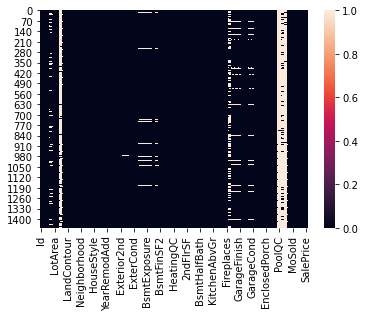

In [85]:
sns.heatmap(df.isnull())

In [86]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [87]:
col = df.columns
columns_removed = []
columns_cleaned_numerical = []
columns_cleaned_categorical = [] 

In [88]:
for i in col:
    if (df[i].isnull().mean()) > 0.5:
        columns_removed.append(i)
    elif (df[i].isnull().mean()) < 0.5 and (df[i].dtype == 'int64' or df[i].dtype == 'float64'):
        columns_cleaned_numerical.append(i)
    elif (df[i].isnull().mean()) < 0.5 and df[i].dtype == 'object':
        columns_cleaned_categorical.append(i)

In [89]:
#Test Data set
df1 = pd.read_csv('test.csv')    

In [90]:
#removing coloums having more null values
for i in columns_removed:
    df.drop(i,axis = 1,inplace = True)
    df1.drop(i,axis = 1, inplace = True)


In [91]:
for j in columns_cleaned_numerical:
    if j == 'SalePrice':
        continue
    df[j] = df[j].fillna(df[j].mean())
    df1[j] = df1[j].fillna(df1[j].mean())
     

In [92]:
for k in columns_cleaned_categorical:
    df[k] = df[k].fillna(df[k].mode()[0])
    df1[k] = df1[k].fillna(df1[k].mode()[0])   

<AxesSubplot:>

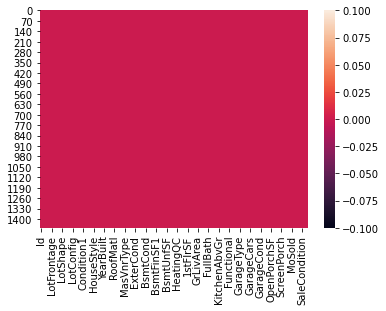

In [93]:
sns.heatmap(df.isnull())

In [95]:
x = df[columns_cleaned_numerical] 
x.drop('SalePrice',axis = 1,inplace=True)

C:\Users\nandh\anaconda3\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [96]:
#Multi colinearity check
y = df['SalePrice']
df.drop('SalePrice',axis = 1,inplace= True )
y

0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1460, dtype: int64

In [97]:
X = sm.add_constant(x)
X

,const,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,1.0,1,60,65.0,8450,7,5,2003,2003,196.0,...,548,0,61,0,0,0,0,0,2,2008
1,1.0,2,20,80.0,9600,6,8,1976,1976,0.0,...,460,298,0,0,0,0,0,0,5,2007
2,1.0,3,60,68.0,11250,7,5,2001,2002,162.0,...,608,0,42,0,0,0,0,0,9,2008
3,1.0,4,70,60.0,9550,7,5,1915,1970,0.0,...,642,0,35,272,0,0,0,0,2,2006
4,1.0,5,60,84.0,14260,8,5,2000,2000,350.0,...,836,192,84,0,0,0,0,0,12,2008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1.0,1456,60,62.0,7917,6,5,1999,2000,0.0,...,460,0,40,0,0,0,0,0,8,2007
1456,1.0,1457,20,85.0,13175,6,6,1978,1988,119.0,...,500,349,0,0,0,0,0,0,2,2010
1457,1.0,1458,70,66.0,9042,7,9,1941,2006,0.0,...,252,0,60,0,0,0,0,2500,5,2010
1458,1.0,1459,20,68.0,9717,5,6,1950,1996,0.0,...,240,366,0,112,0,0,0,0,4,2010


In [98]:
#OLS model fit to find the colinearity intercept of the columns  
model = sm.OLS(y.astype(float), X.astype(float)).fit()

In [100]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.813
Model:                            OLS   Adj. R-squared:                  0.809
Method:                 Least Squares   F-statistic:                     177.1
Date:                Fri, 18 Jun 2021   Prob (F-statistic):               0.00
Time:                        21:16:32   Log-Likelihood:                -17319.
No. Observations:                1460   AIC:                         3.471e+04
Df Residuals:                    1424   BIC:                         3.490e+04
Df Model:                          35                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          4.593e+05   1.41e+06      0.325      0.745   -2.31e+06    3.23e+06
Id               -1.0779      2.187     -0.493      0.622      -5.368       3.212
MSSubClass     -181.2113     27.693     -6.544      0.000    -235.534    -126.888
LotFrontage     -56.5968     51.798     -1.093      0.275    -158.205      45.011
LotArea           0.4283      0.102      4.190      0.000       0.228       0.629
OverallQual     1.73e+04   1188.963     14.551      0.000     1.5e+04    1.96e+04
OverallCond    4680.3797   1033.197      4.530      0.000    2653.628    6707.131
YearBuilt       271.3668     67.570      4.016      0.000     138.819     403.915
YearRemodAdd    134.9512     68.643      1.966      0.049       0.299     269.603
MasVnrArea       31.2989      5.961      5.251      0.000      19.606      42.992
BsmtFinSF1        9.9987      2.531      3.950      0.000       5.033      14.965
BsmtFinSF2       -0.9504      4.509     -0.211      0.833      -9.796       7.895
BsmtUnfSF         0.1095      2.411      0.045      0.964      -4.620       4.839
TotalBsmtSF       9.1578      3.368      2.719      0.007       2.551      15.765
1stFlrSF         18.2958      6.207      2.948      0.003       6.120      30.471
2ndFlrSF         18.1991      5.730      3.176      0.002       6.959      29.440
LowQualFinSF     -5.7366     14.989     -0.383      0.702     -35.140      23.667
GrLivArea        30.7584      5.712      5.385      0.000      19.554      41.963
BsmtFullBath   9371.6472   2612.667      3.587      0.000    4246.558    1.45e+04
BsmtHalfBath   2005.4643   4093.144      0.490      0.624   -6023.775       1e+04
FullBath       3460.5291   2837.557      1.220      0.223   -2105.712    9026.770
HalfBath      -1872.5471   2664.541     -0.703      0.482   -7099.394    3354.300
BedroomAbvGr  -1.008e+04   1702.599     -5.921      0.000   -1.34e+04   -6741.085
KitchenAbvGr  -1.233e+04   5219.340     -2.363      0.018   -2.26e+04   -2094.628
TotRmsAbvGrd   5082.1241   1237.988      4.105      0.000    2653.649    7510.599
Fireplaces     3947.9295   1777.741      2.221      0.027     460.657    7435.202
GarageYrBlt     122.1690     69.630      1.755      0.080     -14.420     258.758
GarageCars     1.126e+04   2876.136      3.916      0.000    5620.158    1.69e+04
GarageArea       -4.2008      9.953     -0.422      0.673     -23.725      15.324
WoodDeckSF       23.8698      8.021      2.976      0.003       8.136      39.603
OpenPorchSF      -2.9105     15.186     -0.192      0.848     -32.699      26.878
EnclosedPorch    11.7879     16.870      0.699      0.485     -21.305      44.880
3SsnPorch        19.7477     31.439      0.628      0.530     -41.924      81.419
ScreenPorch      55.9648     17.197      3.254      0.001      22.231      89.698
PoolArea        -28.3357     23.864     -1.187   

In [101]:
import matplotlib.pyplot as plt
X.iloc[:,1:].corr()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
Id,1.000000,0.011156,-0.009601,-0.033226,-0.028365,0.012609,-0.012713,-0.021998,-0.050199,-0.005024,...,0.017634,-0.029643,-0.000477,0.002889,-0.046635,0.001330,0.057044,-0.006242,0.021172,0.000712
MSSubClass,0.011156,1.000000,-0.357056,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.022895,-0.069836,...,-0.098672,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407
LotFrontage,-0.009601,-0.357056,1.000000,0.306795,0.234196,-0.052820,0.117598,0.082746,0.179283,0.215828,...,0.323663,0.077106,0.137454,0.009790,0.062335,0.037684,0.180868,0.001168,0.010158,0.006768
LotArea,-0.033226,-0.139781,0.306795,1.000000,0.105806,-0.005636,0.014228,0.013788,0.103960,0.214103,...,0.180403,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261
OverallQual,-0.028365,0.032628,0.234196,0.105806,1.000000,-0.091932,0.572323,0.550684,0.410238,0.239666,...,0.562022,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347
OverallCond,0.012609,-0.059316,-0.052820,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.127788,-0.046231,...,-0.151521,-0.003334,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.003511,0.043950
YearBuilt,-0.012713,0.027850,0.117598,0.014228,0.572323,-0.375983,1.000000,0.592855,0.314745,0.249503,...,0.478954,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618
YearRemodAdd,-0.021998,0.040581,0.082746,0.013788,0.550684,0.073741,0.592855,1.000000,0.179186,0.128451,...,0.371600,0.205726,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.035743
MasVnrArea,-0.050199,0.022895,0.179283,0.103960,0.410238,-0.127788,0.314745,0.179186,1.000000,0.263582,...,0.372567,0.159349,0.124965,-0.109849,0.018795,0.061453,0.011723,-0.029815,-0.005940,-0.008184
BsmtFinSF1,-0.005024,-0.069836,0.215828,0.214103,0.239666,-0.046231,0.249503,0.128451,0.263582,1.000000,...,0.296970,0.204306,0.111761,-0.102303,0.026451,0.062021,0.140491,0.003571,-0.015727,0.014359
